In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=25)
rc('ytick', labelsize=25)
font = {'family' : 'normal',
        'weight' : 'light'}
rc('font', **font)
import exoplanet
from scipy.signal import find_peaks
import time

import sys
sys.path.append("../src")
import transit_model as tm
from inspection import *
from pdm import *

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/jbirky/anaconda3/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/jbirky/.lightkurve/cache. Please move all the files in the legacy directory /home/jbirky/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
sample = pd.read_csv("/home/jbirky/Dropbox/research/premap22/tables/verified_classifications_periods.csv")
sample = sample[['TIC', 'class_jb', 'class_jd', 'class_lp', 'class_rf', 'period_x']].drop_duplicates()
sel = sample[sample['class_jb'] == 'sp']
sel = sel[sel['class_lp'] == 'sp']
sel

,TIC,class_jb,class_jd,class_lp,class_rf,period_x
4,158150633,sp,NaN,sp,sp,4.156442
8,35101462,sp,sp,sp,sp,4.172902
13,27312189,sp,sp,sp,sp,4.177907
14,141268467,sp,NaN,sp,sp,4.181090
16,198555959,sp,NaN,sp,sp,4.192051
...,...,...,...,...,...,...
3834,231275247,sp,NaN,sp,sp,4.007902
3840,264537668,sp,NaN,sp,sp,4.030704
3921,38677487,sp,sp,sp,sp,4.080931
3922,30816076,sp,sp,sp,sp,4.083180


In [3]:
csample = pd.read_csv("combined_sample_verified_flags.csv")
flag_sample = csample[csample['flag binary'] == 1]
flag_sample

,Unnamed: 0.1,Unnamed: 0,TIC,primary transit amplitute,primary transit time,primary transit duration,secondary transit amplitute,secondary transit time,secondary transit duration,orbital period,rotational period,rotation period inspected,flag note,sample,flag binary,verified_flag
2,2,2,104909909,0.098313,1.020848,0.030,0.028050,-0.350000,0.030,2.573791,22.170267,NaN,potential n-body system,marshall,1,nbody
10,10,10,66602813,0.443183,-0.507821,0.030,0.200286,0.873925,0.030,2.764074,8.660695,NaN,non-periodic rotational behaviour,marshall,1,non-periodic
15,15,15,130158361,0.505940,-0.799916,0.030,0.357846,0.629254,0.030,2.850038,130.835100,NaN,non-periodic rotational period,marshall,1,non-periodic
21,21,21,137503140,0.249395,0.020834,0.030,0.031207,-1.446522,0.030,2.935537,3.037783,2.999954,non-periodic rotational period,marshall,1,none
26,26,26,46908113,0.058019,1.430448,0.030,0.004605,-0.076367,0.030,3.011626,119.896489,2.958273,non-periodic rotation,marshall,1,high rotation period scatter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,326,144,8769657,0.166738,0.040556,0.012,0.160000,-0.173000,0.012,0.426470,136.457795,0.000000,non-periodic rotational period,leah,1,0
327,327,145,198152578,0.006072,-0.030461,0.010,0.006000,0.200000,0.010,0.454678,19.444328,0.000000,non-periodic rotational period,leah,1,0
329,329,147,146688260,0.018348,-0.206491,0.013,0.007938,0.040000,0.013,0.503069,0.503649,0.000000,non-periodic rotational period,leah,1,0
346,346,164,219739347,0.241455,-0.294031,0.012,0.237664,0.088270,0.012,0.773526,0.386342,0.000000,non-periodic rotational period,leah,1,0


1. inspect all flagged fits
2. inspect all unflagged fits
3. inspect all missing targets

52280468
93    non-periodic rotational period
Name: flag note, dtype: object


/home/jbirky/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


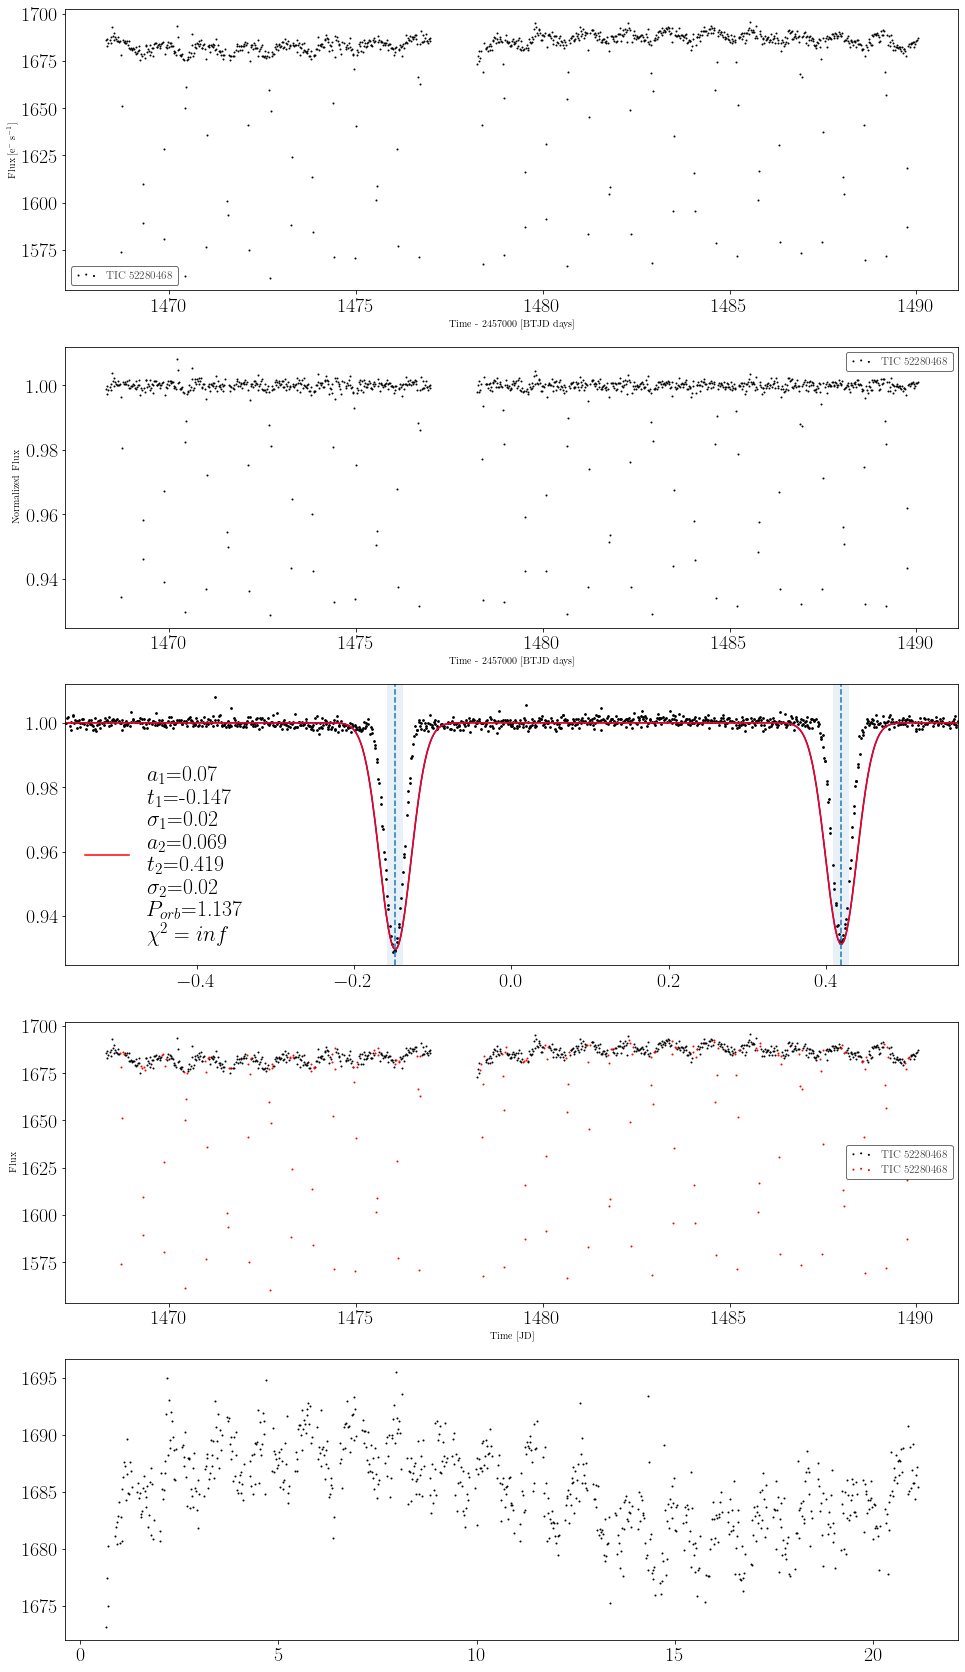

,Unnamed: 0.1,Unnamed: 0,TIC,primary transit amplitute,primary transit time,primary transit duration,secondary transit amplitute,secondary transit time,secondary transit duration,orbital period,rotational period,rotation period inspected,flag note,sample,flag binary,verified_flag
93,93,93,52280468,0.070374,-0.14738,0.02,0.068702,0.419488,0.02,1.13652,21.729366,1.093743,non-periodic rotational period,marshall,1,non-periodic


In [4]:
ii = 18
flag_id = list(flag_sample['TIC'])[ii]
table_entry = flag_sample[flag_sample['TIC'] == flag_id]
print(flag_id)
print(table_entry['flag note'])
t0 = format_t0_from_table(table_entry)

model = tm.TransitModel(flag_id, mission='TIC', pipeline='SPOC', download_all=False)
model.bls_period = np.nan

tmask, rmask = model.apply_transit_mask(sol=t0, remove_outliers=False)
model.save_masked_lcs(file_path="masked_lcs/")
model.fit_rotation(method='ls')
model.plot_best_fit(t0=t0, sol=t0)

t0_guess = t0
table_entry

{'a1': 0.3524380139550749, 't1': -0.422507286742352, 'd1': 0.02, 'a2': 0.035, 't2': 0.65, 'd2': 0.02, 'porb': 2.1601858}


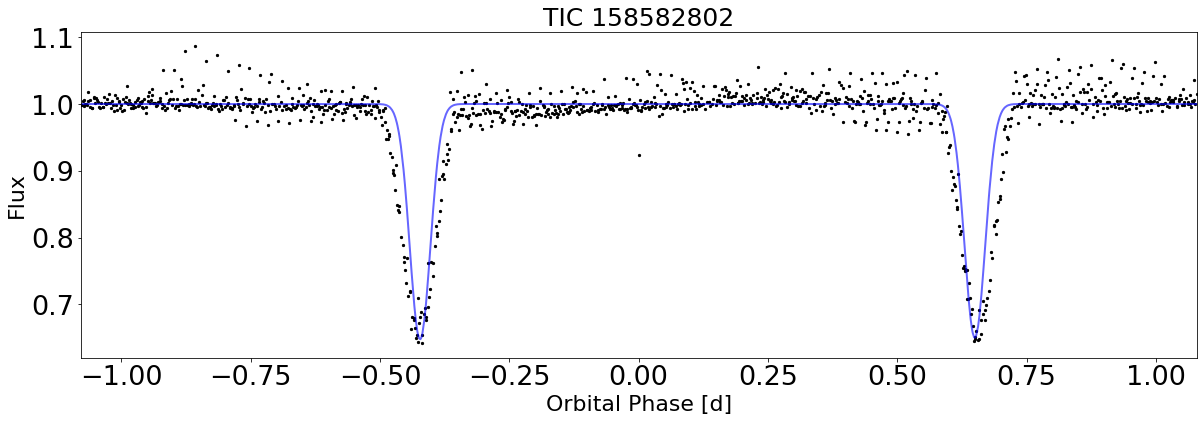

In [79]:
params = ["a1", "t1", "d1", "a2", "t2", "d2", "porb"]
print(dict(zip(params, t0)))

# t0_guess[0] = .006    # amplitude
# # t0_guess[1] = 0   # time
# t0_guess[2] = .03   # duration
t0_guess[3] = .35   # amplitude
t0_guess[4] = 0.65  # time
# t0_guess[5] = .03    # duration
# t0_guess[6] /= 2   # porb

plot_t0(model, t0_guess, tic=flag_id)

10.797427415847778


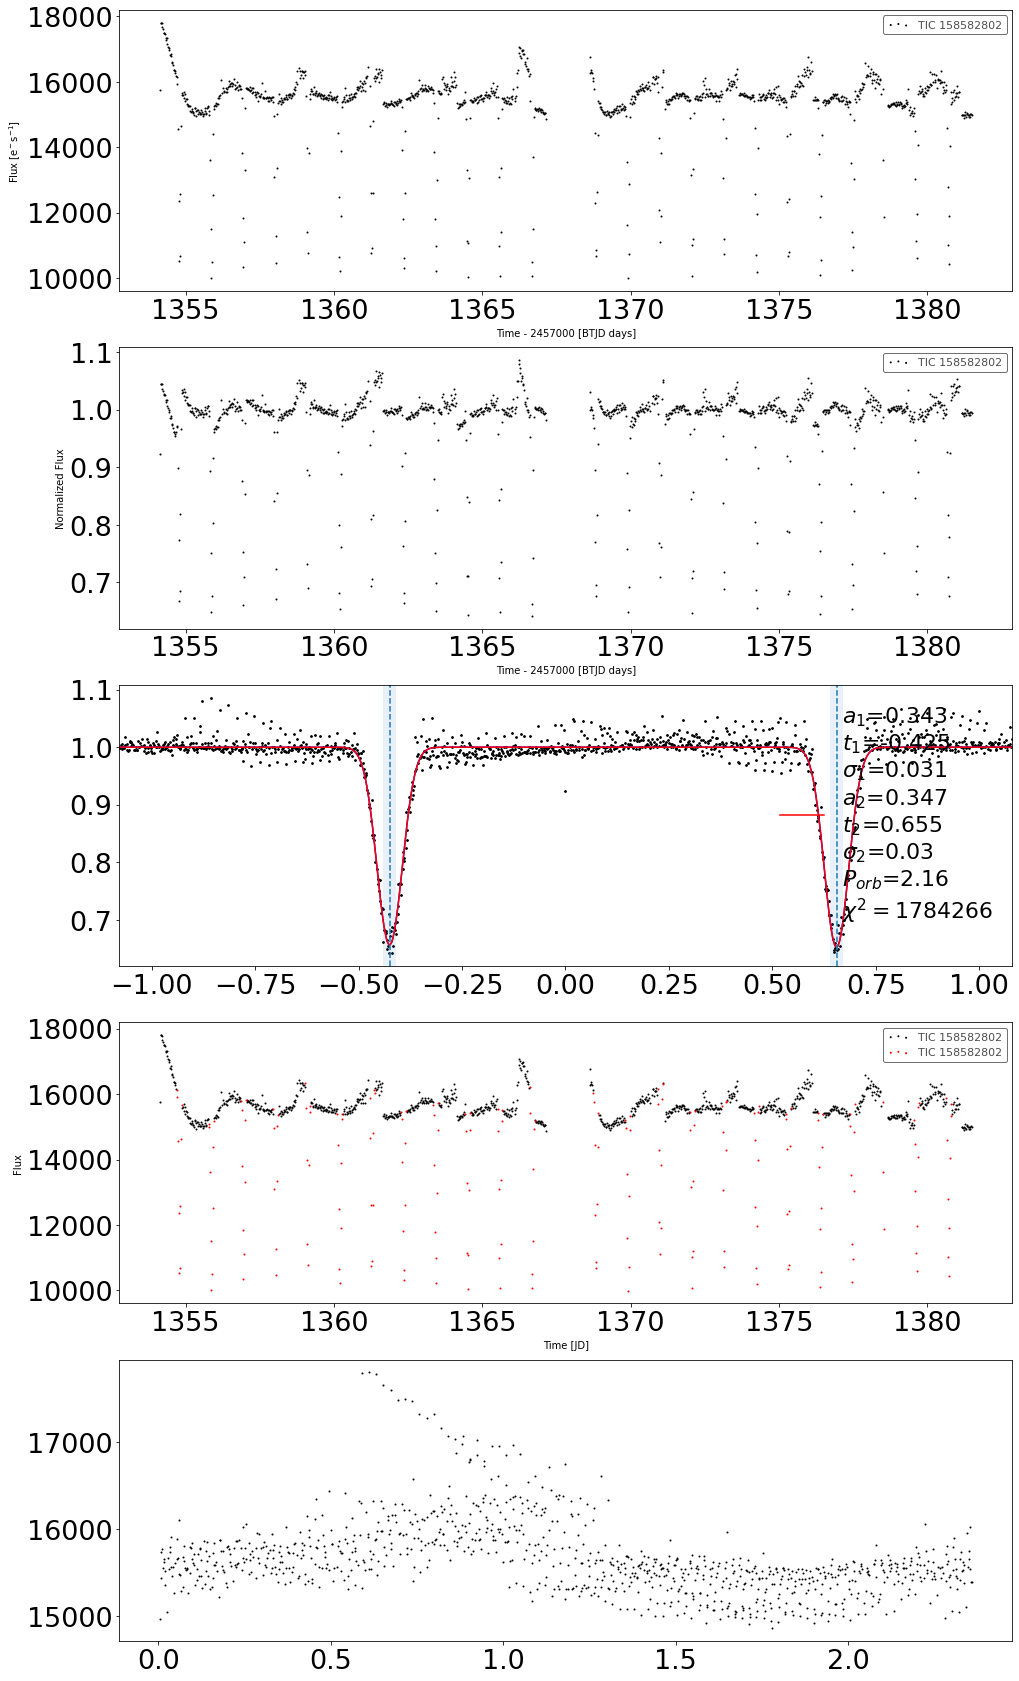

In [80]:
tinit = time.time()
model.fit_model(t0=t0_guess)
model.est_duration()
model.est_eccentricity()
model.apply_transit_mask(remove_outliers=False)
model.fit_rotation(method='ls')
# model.model_fit_summary()
print(time.time() - tinit)

model.plot_best_fit(t0=model.sol)

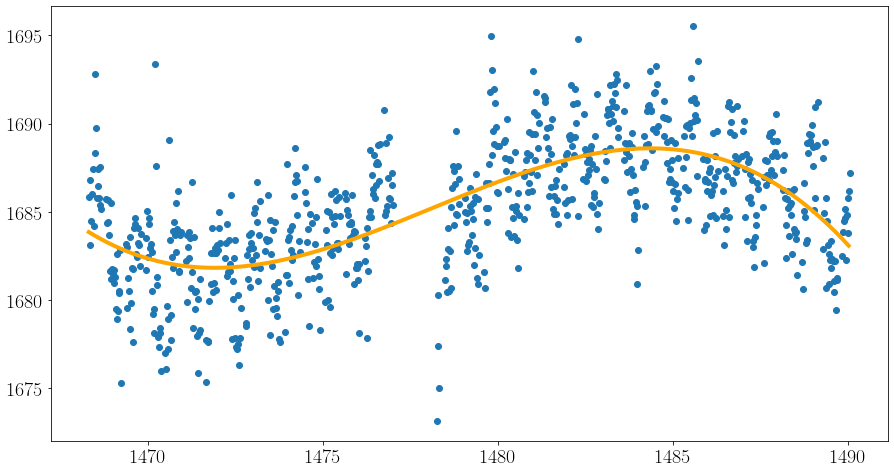

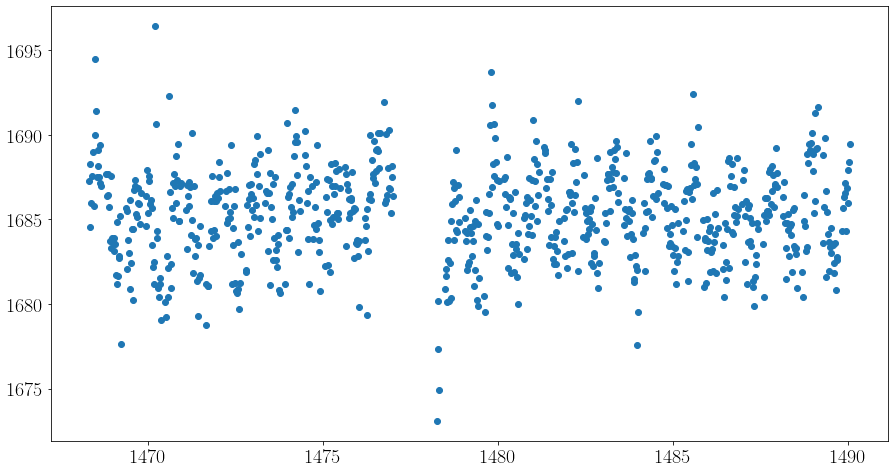

In [5]:
# rtime, rflux, rflux_err = model.lc_rmask.time.value, model.lc_rmask.flux.value, model.lc_rmask.flux_err.value
rtime, rflux, rflux_err = np.load(f"masked_lcs/TIC_{flag_id}_rmasked.npy")
rtime = rtime[~np.isnan(rflux)]
rflux_err = rflux_err[~np.isnan(rflux)]
rflux = rflux[~np.isnan(rflux)]

xp = np.arange(min(rtime), max(rtime), 0.1)

z = np.polyfit(rtime, rflux, 3)
poly = np.poly1d(z)
pflux = rflux - poly(rtime) + np.median(rflux)

plt.figure(figsize=[15,8])
plt.scatter(rtime, rflux)
plt.plot(xp, poly(xp), color="orange", linewidth=4)
plt.show()

plt.figure(figsize=[15,8])
plt.scatter(rtime, pflux)
plt.show()

1377.0524576254734


/home/jbirky/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


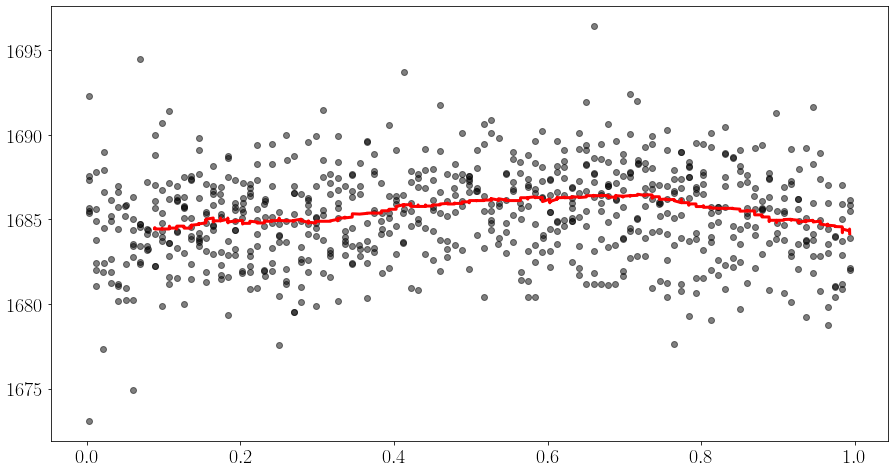

In [27]:
plc = PhaseLightCurve(rtime, pflux, rflux_err)
pdm_time, pdm_flux, pdm_flux_err = plc.phase_fold(float(table_entry["rotation period inspected"]))
plc.smooth_data()
print(phase_dispersion(float(table_entry["rotation period inspected"]), plc, 64))

plt.figure(figsize=[15,8])
plt.scatter(pdm_time, pdm_flux, color="k", alpha=.5)
plt.plot(pdm_time, plc.bin_flux, color="r", linewidth=3)
plt.show()

/home/jbirky/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


891.9727518620821


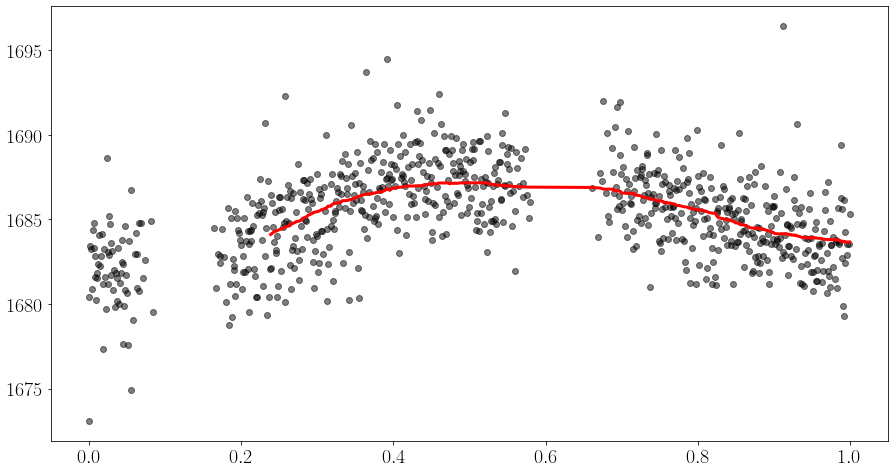

In [26]:
plc = PhaseLightCurve(rtime, pflux, rflux_err)
pdm_best_period, pdm_best_chival = phase_dispersion_minimization(plc, float(table_entry["rotation period inspected"]), bound=0.1, window=64)
pdm_time, pdm_flux, pdm_flux_err = plc.phase_fold(pdm_best_period)
plc.smooth_data()
print(pdm_best_chival)

plt.figure(figsize=[15,8])
plt.scatter(pdm_time, pdm_flux, color="k", alpha=.5)
plt.plot(pdm_time, plc.bin_flux, color="r", linewidth=3)
plt.show()

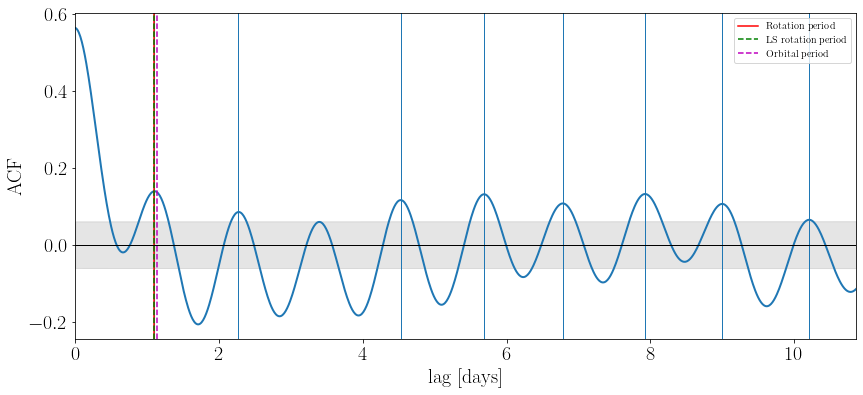

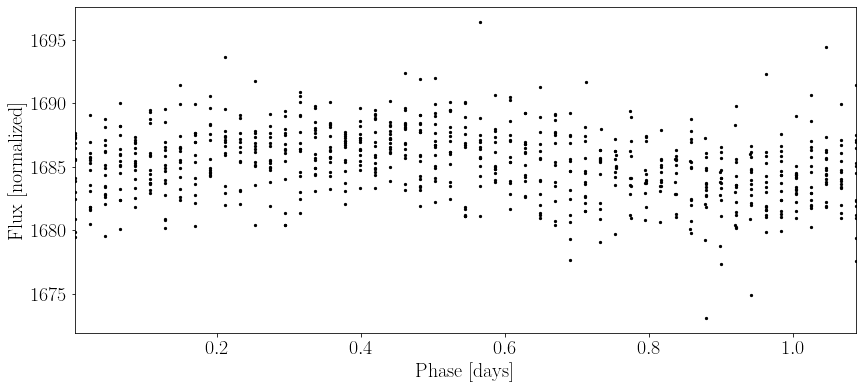

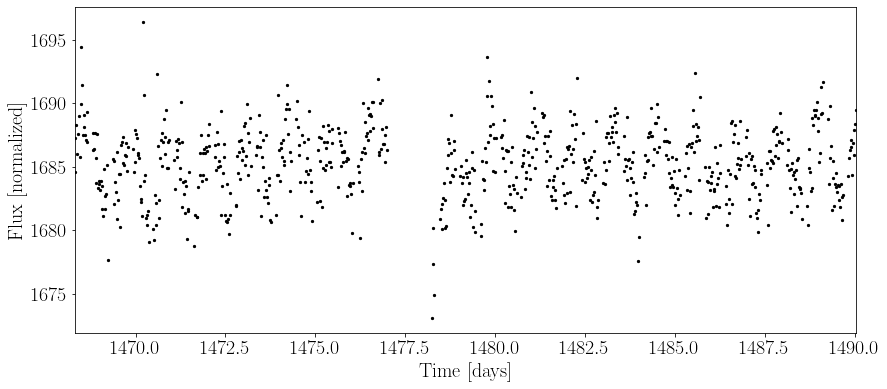

In [16]:
acf_period = inspect_rotation(rtime, pflux, rflux_err, selected_peak=0, ls_period=float(table_entry["rotational period"]), orb_period=float(table_entry["orbital period"]))
csample.at[csample.loc[csample.TIC == flag_id].index[0], "rotation period inspected"] = acf_period

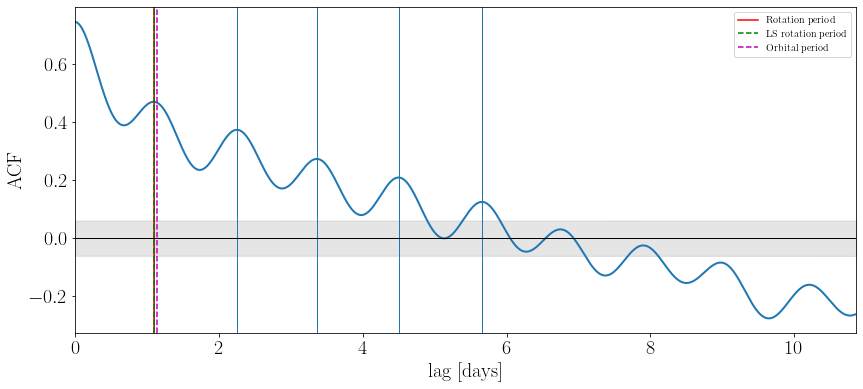

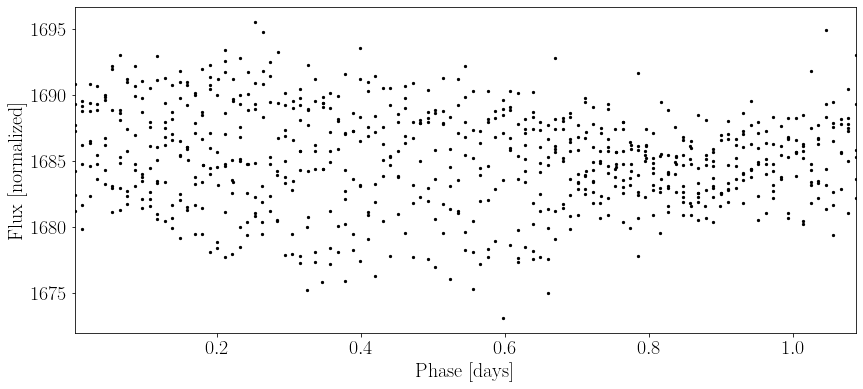

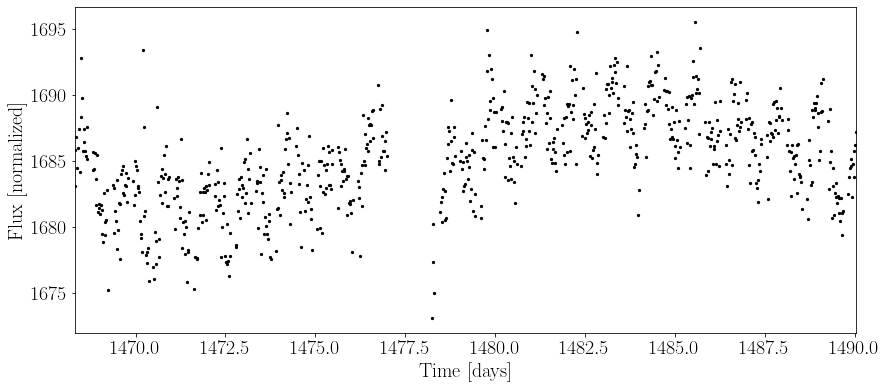

In [13]:
rtime, rflux, rflux_err = np.load(f"masked_lcs/TIC_{flag_id}_rmasked.npy")
acf_period = inspect_rotation(rtime, rflux, rflux_err, selected_peak=0, ls_period=float(table_entry["rotational period"]), orb_period=float(table_entry["orbital period"]))
csample.at[csample.loc[csample.TIC == flag_id].index[0], "rotation period inspected"] = acf_period

In [85]:
csample.at[csample.loc[csample.TIC == flag_id].index[0], "verified_flag"] = "non-periodic"
csample[csample.TIC == flag_id]

,Unnamed: 0,TIC,primary transit amplitute,primary transit time,primary transit duration,secondary transit amplitute,secondary transit time,secondary transit duration,orbital period,rotational period,rotation period inspected,flag note,sample,flag binary,verified_flag
93,93,52280468,0.070374,-0.14738,0.02,0.068702,0.419488,0.02,1.13652,21.729366,1.093743,non-periodic rotational period,marshall,1,non-periodic


In [45]:
csample.at[csample.loc[csample.TIC == flag_id].index[0], "verified_flag"] = "high rotation period scatter"
csample[csample.TIC == flag_id]

,Unnamed: 0,TIC,primary transit amplitute,primary transit time,primary transit duration,secondary transit amplitute,secondary transit time,secondary transit duration,orbital period,rotational period,rotation period inspected,flag note,sample,flag binary,verified_flag
62,62,61381436,0.071274,0.230712,0.04,0.006476,-1.7,0.04,3.888433,4.460569,4.031179,non-periodic rotational period,marshall,1,high rotation period scatter


In [49]:
csample.at[csample.loc[csample.TIC == flag_id].index[0], "verified_flag"] = "nbody"
csample[csample.TIC == flag_id]

,TIC,primary transit amplitute,primary transit time,primary transit duration,secondary transit amplitute,secondary transit time,secondary transit duration,orbital period,rotational period,rotation period inspected,flag note,sample,flag binary,verified_flag
2,104909909,0.098313,1.020848,0.03,0.02805,-0.35,0.03,2.573791,22.170267,NaN,potential n-body system,marshall,1,nbody


In [15]:
csample.at[csample.loc[csample.TIC == flag_id].index[0], "verified_flag"] = "none"
csample[csample.TIC == flag_id]

,Unnamed: 0,TIC,primary transit amplitute,primary transit time,primary transit duration,secondary transit amplitute,secondary transit time,secondary transit duration,orbital period,rotational period,rotation period inspected,flag note,sample,flag binary,verified_flag
27,27,39903672,0.02421,0.500389,0.02,0.00405,-1.010206,0.02,3.031222,3.147351,2.989585,non-periodic rotation,marshall,1,none


In [51]:
csample.at[csample.loc[csample.TIC == flag_id].index[0], "verified_flag"] = "detrending issues"
csample[csample.TIC == flag_id]

,Unnamed: 0,TIC,primary transit amplitute,primary transit time,primary transit duration,secondary transit amplitute,secondary transit time,secondary transit duration,orbital period,rotational period,rotation period inspected,flag note,sample,flag binary,verified_flag
77,77,126325291,0.419208,-0.139934,0.02,0.0838,0.264399,0.02,0.829377,17.057163,NaN,non-periodic rotational period,marshall,1,detrending issues


In [82]:
csample.at[csample.loc[csample.TIC == flag_id].index[0], "verified_flag"] = "non-periodic, potential equal mass"
csample[csample.TIC == flag_id]

,Unnamed: 0,TIC,primary transit amplitute,primary transit time,primary transit duration,secondary transit amplitute,secondary transit time,secondary transit duration,orbital period,rotational period,rotation period inspected,flag note,sample,flag binary,verified_flag
88,88,158582802,0.352438,-0.422507,0.02,0.069337,0.0,0.02,1.080093,2.39037,2.291655,"believe should be removed from catalog, don't ...",marshall,1,"non-periodic, potential equal mass"


In [86]:
csample.to_csv("combined_sample_verified_flags.csv")
print(f"{len(csample[csample['verified_flag'] != '0'])} / {len(csample)} completed")
csample

,Unnamed: 0,TIC,primary transit amplitute,primary transit time,primary transit duration,secondary transit amplitute,secondary transit time,secondary transit duration,orbital period,rotational period,rotation period inspected,flag note,sample,flag binary,verified_flag
0,0,229910746,0.172121,-0.965335,0.03,0.145559,0.291669,0.03,2.506334,2.435621,2.447926,0.0,marshall,0,0
1,1,148781497,0.028601,1.029443,0.03,0.002501,-0.243111,0.03,2.539905,2.576968,2.572856,0.0,marshall,0,0
2,2,104909909,0.098313,1.020848,0.03,0.028050,-0.350000,0.03,2.573791,22.170267,NaN,potential n-body system,marshall,1,nbody
3,3,260003467,0.008364,-1.022303,0.02,0.004761,0.267945,0.02,2.604483,2.623848,2.593766,0.0,marshall,0,0
4,4,55524055,0.152344,0.034519,0.02,0.048679,-1.282226,0.02,2.649443,2.627579,2.625016,0.0,marshall,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,177,238162238,0.038318,-0.124183,0.02,0.029976,1.084161,0.02,2.437438,2.414390,2.437512,0.0,leah,0,0
359,178,63449090,0.096613,-0.613349,0.03,0.001479,-0.420000,0.03,2.441996,4.853182,4.659030,0.0,leah,0,0
360,179,237116051,0.260139,0.141201,0.03,0.238176,-1.092586,0.03,2.462943,2.435584,2.374973,0.0,leah,0,0
361,180,192087959,0.068169,-0.573927,0.03,0.067818,0.652919,0.03,2.476865,1.241334,1.260407,0.0,leah,0,0


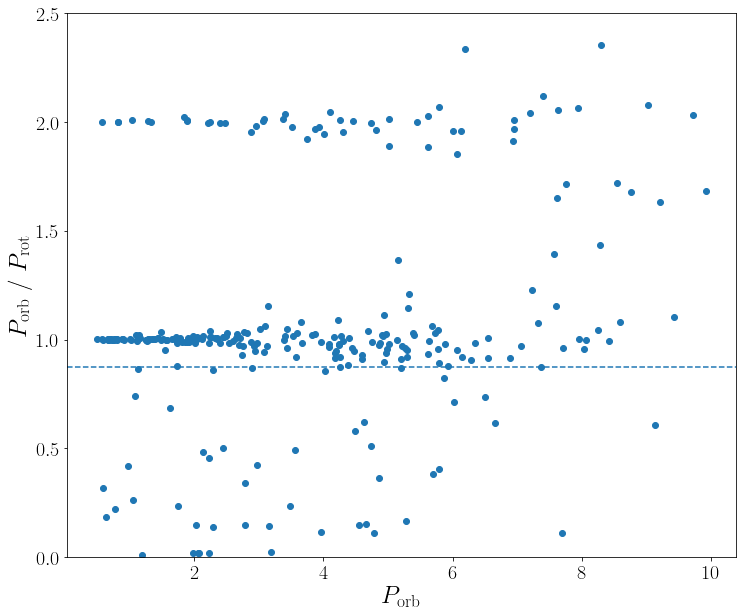

In [4]:
nonflag = csample[csample['flag binary'] == 0]
plt.figure(figsize=[12,10])
plt.scatter(nonflag["orbital period"], nonflag["orbital period"] / nonflag["rotational period"])
plt.axhline(y=7/8, linestyle="--")
plt.xlabel(r"$P_{\rm orb}$", fontsize=25)
plt.ylabel(r"$P_{\rm orb}$ / $P_{\rm rot}$", fontsize=25)
plt.ylim(0,2.5)
plt.show()